# Dimensionality reduction using Principal component analysis

In previous lectures you have seen that if the number of features too large compared to the number of samples, predictive models can often result in overfitting and do not generalise well for unseen data.

Recall the example where we used multivariate linear regression to predict GA of a preterm baby. The model was fitted really well to the training data, but the cross-validation score was rather poor.

In [3]:
# Load data
import pandas as pd
import numpy as np

df = pd.read_csv("GA-structure-volumes-preterm.csv",header=None)
structure_volumes = df.values
Features = structure_volumes[:,1:] # volumes - we have 86 features and 164 samples
Labels = structure_volumes[:,0] # GA - 164 

# Multivariate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(Features,Labels)
R2_score = model.score(Features,Labels)
cv_score = cross_val_score(model, Features, Labels, cv=5).mean()
 
rmse = np.sqrt(-cross_val_score(model, Features, Labels, cv=5,scoring='neg_mean_squared_error').mean())
print("R2 score is {} and cross-validated R2 score is {}".format(round(R2_score,2), round(cv_score,2)))
print("Cross-validated root mean squared error is {} weeks GA".format(round(rmse,2)))

R2 score is 0.97 and cross-validated R2 score is 0.68
Cross-validated root mean squared error is 2.08 weeks GA


We have seen that the overfitting can be reduced and model performance improved by penalising the weights of the regression with ridge or lasso penalty.

Now we will now explore an alternative strategy - reducing dimension of the feature vector using principal component analysis.

__Task 1:__ Using sklearn object ```PCA``` estimate and plot the cumulative distribution of ordered eigenvalues (or explained variance for each component). 

*Hint:* a cumulative sum can be estimated using the ```np.cumsum()``` function.

***Note:*** The sklearn ```PCA``` function automatically orders components by eigenvalue (starting with largest). This will not necessarily be true of the functions you build for yourself.

Text(0, 0.5, 'cumulative sum')

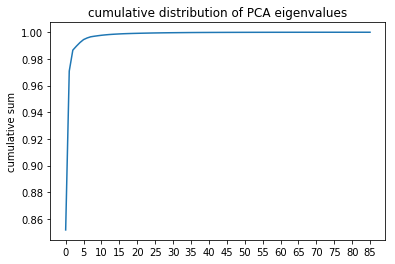

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 

# create PCA model 
# fit the data 
# note that PCA is unsupervised - we use only Features for fitting!
# fill in
pca = PCA()# fill in
pca.fit(Features)


# estimate the cumulative distribution of the eigenvalues
# here we use the .explained_variance_ratio_ atribute it will show result as a proportion of variance from 0-1
cumulative_sum=np.cumsum(pca.explained_variance_ratio_)

# plot the distribution
plt.plot(cumulative_sum)
plt.xticks(np.arange(0,pca.explained_variance_ratio_.shape[0],5))
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')
plt.ylabel('cumulative sum')


__Task 2:__ Now try to determine an appropriate cut off by also plotting lines parallel to the y-axis

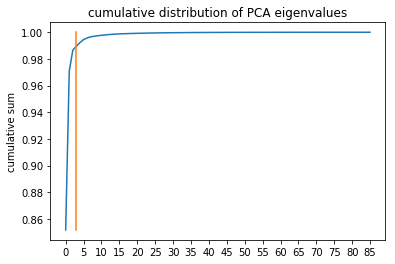

In [5]:
# re-plot the distribution
plt.plot(cumulative_sum)
plt.xticks(np.arange(0,pca.explained_variance_ratio_.shape[0],5))
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')
plt.ylabel('cumulative sum')


# now select lines parallel to the y-axis 
# play with different values of cutoff to determine a good one
# a good rule of thumb would be where it levels out 
# you can see after 10 eigenvalues the remaining dimensions have minimal contribution to variance and from 5-10 is very little
# we are aiming to optimise the parameters of our model (here the number of components) so as to ge the best performance for our left out data
# estimated through cross validation as shown below
cutoff = 3
x=np.ones(10)*cutoff
y=np.linspace(pca.explained_variance_ratio_[0],1,10)
plt.plot(x,y)

__Task 3__: Use these to determine an appropriate cut off for PCA dimensionality reduction. Re-run PCA with this reduced set. 

*Hint:* use parameter ```n_components```

In [18]:
# create PCA model with number of components equal to the chosen cutoff
# fill in this line making pca the name of your model
pca = PCA(n_components=3)# fill in
# now fit the PCA
pca.fit(Features)



# Transform the original feature vectore to the reduced feature vector
newFeatures = pca.transform(Features) # note you could use fit_transform to combine lines 5 nad 10 into one step

# check the size of the newFeatures
# see we have moved froman 896 dimensional feaure spacef to just 3 dimensions
print('Size of original features: ', Features.shape)
print('Size of new features: ', newFeatures.shape)


Size of original features:  (164, 86)
Size of new features:  (164, 3)


__Task 4:__ Run the code below to perform linear regression on ```newFeatures``` evaluate performance. How does it compare to the linear regression using all 86 features?

In [19]:
# Perform linear regression using the new features
model_new = LinearRegression()
model_new.fit(newFeatures,Labels)
R2_score_new = model_new.score(newFeatures,Labels)
cv_score_new = cross_val_score(model_new, newFeatures, Labels, cv=5).mean()
rmse_new = np.sqrt(-cross_val_score(model_new, newFeatures, Labels, cv=5, scoring='neg_mean_squared_error').mean())

# we can see now that we get a better performance a cross our left out validations sets
# this suggests that above a certain range the components encode noise 
# best cross validated performance is technically for 3 components but anything in range from 3-10 is ok 
# you wills see CV error jumps around and you never know how it performs on unseen data 
# parameter optimisation is a judgement call based on thevalidation metrics and data you have available
print("New model R2 score is {} and cross-validated R2 score is {}".format(round(R2_score_new,2), round(cv_score_new,2)))
print("Cross-validated root mean squared error after using PCA is {} weeks GA".format(round(rmse_new,2)))

New model R2 score is 0.92 and cross-validated R2 score is 0.9
Cross-validated root mean squared error after using PCA is 1.22 weeks GA


We have obtained a very good result. Cross-validated RMSE is in similar range than for penalised linear regression. We can therefore see that dimensionality reduction using PCA prevented the problem of overfitting.

__Task 5:__ Change dimensionality of PCA explore the impact on the result.